# Explore predictor variables for floor height

Explore correlation between exisiting floor height data and DEM and other building attributes

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Use only points matched to footprint
df_footprint = gpd.read_file('launceston_FFH_footprint_geometry.geojson')

## Match to DEM

In [5]:
import rioxarray

#DEM file
#5m
dempath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston DEM/5m_DEM_70570.zip'

# Load the DEM raster from the ZIP file
dem_raster = rioxarray.open_rasterio(f'zip://{dempath}!5m_DEM.tif')

# Ensure that df_footprint is a GeoDataFrame with geometries
# Initialize lists to store min and max values
min_values = []
max_values = []

df_footprint = df_footprint.to_crs(dem_raster.rio.crs)
# Iterate through each polygon in df_footprint
for irow, row in df_footprint.iterrows():
    # Mask the DEM raster with the polygon geometry
    masked_dem = dem_raster.rio.clip(df_footprint.geometry.iloc[irow:irow+1], drop=True)

    # Flatten the masked array and remove any NoData values
    dem_values = masked_dem.values[masked_dem.values != masked_dem.rio.nodata]

    # Append the min and max values
    min_values.append(dem_values.min() if dem_values.size > 0 else None)
    max_values.append(dem_values.max() if dem_values.size > 0 else None)

# Add min and max values to df_footprint
df_footprint['min_dem_5m'] = min_values
df_footprint['max_dem_5m'] = max_values



In [14]:
from rasterio.enums import Resampling

#DEM file
#5m
dempath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston DEM/5m_DEM_70570.zip'

# Load the DEM raster from the ZIP file
dem_raster_5m = rioxarray.open_rasterio(f'zip://{dempath}!5m_DEM.tif')

# Calculate scaling factor to reach 1m resolution
scale_factor = 5  # From 5m to 1m

# Upscale to 1m resolution by interpolation
dem_raster = dem_raster_5m.rio.reproject(
    dem_raster_5m.rio.crs,
    shape=(dem_raster_5m.shape[1] * scale_factor, dem_raster_5m.shape[2] * scale_factor),
    resampling=Resampling.bilinear  # Use bilinear interpolation for smoother scaling
)

# Ensure that df_footprint is a GeoDataFrame with geometries
# Initialize lists to store min and max values
min_values = []
max_values = []

df_footprint = df_footprint.to_crs(dem_raster.rio.crs)
# Iterate through each polygon in df_footprint
for irow, row in df_footprint.iterrows():
    # Mask the DEM raster with the polygon geometry
    masked_dem = dem_raster.rio.clip(df_footprint.geometry.iloc[irow:irow+1], drop=True)

    # Flatten the masked array and remove any NoData values
    dem_values = masked_dem.values[masked_dem.values != masked_dem.rio.nodata]

    # Append the min and max values
    min_values.append(dem_values.min() if dem_values.size > 0 else None)
    max_values.append(dem_values.max() if dem_values.size > 0 else None)

# Add min and max values to df_footprint
df_footprint['min_dem_1m_from_5m'] = min_values
df_footprint['max_dem_1m_from_5m'] = max_values

In [6]:

# Define output path for the VRT
vrt_path = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston DEM/1m_DEM.vrt'

# Load the DEM raster from the ZIP file
dem_raster = rioxarray.open_rasterio(vrt_path)

# Ensure that df_footprint is a GeoDataFrame with geometries
# Initialize lists to store min and max values
min_values = []
max_values = []

df_footprint = df_footprint.to_crs(dem_raster.rio.crs)
# Iterate through each polygon in df_footprint
for irow, row in df_footprint.iterrows():
    # Mask the DEM raster with the polygon geometry
    masked_dem = dem_raster.rio.clip(df_footprint.geometry.iloc[irow:irow+1], drop=True)

    # Flatten the masked array and remove any NoData values
    dem_values = masked_dem.values[masked_dem.values != masked_dem.rio.nodata]

    # Append the min and max values
    min_values.append(dem_values.min() if dem_values.size > 0 else None)
    max_values.append(dem_values.max() if dem_values.size > 0 else None)

# Add min and max values to df_footprint
df_footprint['min_dem_1m'] = min_values
df_footprint['max_dem_1m'] = max_values


In [71]:
# Remove LCC_FLOOR ==0
df_footprint = df_footprint[df_footprint.LCC_FLOOR>0]

In [72]:
df_footprint.to_file('launceston_FFH_footprint_geometry_dem_range.geojson')

### Compare 5m and 1m DEM

In [35]:
df_footprint.head()

,EASTING,NORTHING,UFI,ZONE,DEM,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,NEXIS_CAD1,SA1_CODE,SA2_CODE,LGA_CODE_2,MB_CODE_20,GCC_CODE_2,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,ABS_BusReg,Survey_Res,Survey_COM,Survey_Grd,Survey_G_1,Survey_Bas,Survey_Gar,Survey_Par,Survey_Chi,Survey_C_1,Survey_Gab,NEXIS_CONS,NEXIS_BLOC,LOCAL_FOOT,NEXIS_FOOT,SA1,USE,NEXIS_FLOO,LOCAL_YEAR,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_Nr_,Survey_C_2,Survey_Ind,Vulnerabil,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,Area_m,Count_,Min_OBJECT,LCC_FLOOR,check1,POINT_X_1,POINT_Y_1,ROWS,SA11,GVULN,GVULV,FFH,index_right,osm_id,geometry,min_dem_5m,max_dem_5m,min_dem_1m,max_dem_1m,range_dem_5m,range_dem_1m,FFH_1m,FFH_5m,min_dem_1m_from_5m,max_dem_1m_from_5m
0,511068.760790,5.412219e+06,28,11.0 Inner Residential,5.212643,GNAF_GATAS702296648,6 MIDDLE STREET,LAUNCESTON,7250,None,628416_511066_5412229_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,3.0,M,N,SH,497.686200,167.682205,167.682205,6.020110e+10,Residential,167.682205,1900.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,167.439675,0.0,0.0,3.37,0.0,147.132500,-41.441522,1.0,6.020110e+10,4.0,10.0,-1.842643,10158918,NaN,"POLYGON ((511069.038 5412230.934, 511074.462 5...",4.538689,5.327725,4.400915,5.680000,0.789036,1.279085,-1.030915,-1.168689,4.406303,5.458727
1,511048.726805,5.412229e+06,26,11.0 Inner Residential,5.162260,GNAF_GATAS702290011,8 MIDDLE STREET,LAUNCESTON,7250,None,1202407_511049_5412227_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,2.0,M,N,SH,293.477468,95.055771,95.055771,6.020110e+10,Residential,95.055771,1880.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,95.223500,0.0,0.0,3.37,0.0,147.132260,-41.441433,1.0,6.020110e+10,4.0,10.0,-1.792260,3491497,NaN,"POLYGON ((511040.023 5412235.278, 511050.529 5...",4.624838,5.187843,4.510356,5.943333,0.563005,1.432977,-1.140356,-1.254838,4.316125,5.412035
2,511391.246673,5.413723e+06,304,11.0 Inner Residential,1.195072,GNAF_GATAS702198206,17 BEDFORD STREET,INVERMAY,7248,None,1203310_511393_5413720_55,0.0,6.020110e+10,602011036.0,64010.0,6.008809e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,3.0,RTF,0.0,0.0,no,2.0,Medium,no,SH,208.653966,95.321716,95.321716,6.020110e+10,Residential,95.321716,1870.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,BK - Brick,Cavity and Solid Masonry,Cavity Brick,1.0,None,None,11.0,1,None,None,hsebk,77.695083,1.0,1864.0,1.44,0.0,147.136332,-41.427971,1.0,6.020110e+10,3.0,9.0,0.244928,1696958,298521431.0,"POLYGON ((511384.339 5413724.569, 511392.890 5...",1.494960,1.596741,1.180000,1.500000,0.101781,0.320000,0.260000,-0.054960,1.480528,1.622614
3,511447.750957,5.413789e+06,342,11.0 Inner Residential,1.387053,GNAF_GATAS702323086,3 RUSSELL STREET,INVERMAY,7248,None,1121969_511449_5413788_55,0.0,6.020110e+10,602011036.0,64010.0,6.008869e+10,0.0,Large Town,R4 - House & Flat/s,Large Town,Residential,0.0,0.0,None,3.0,SoG,0.0,0.0,N,0.0,0,N,SD,236.086026,135.544403,135.544403,6.020110e+10,Residential,135.544403,1910.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,BK - Brick,Cavity and Solid Masonry,Cavity Brick,1.0,None,None,10.0,1,None,None,hsewb,135.377206,1.0,1144.0,1.70,0.0,147.137007,-41.427376,1.0,6.020110e+10,3.0,9.0,0.312947,1696773,298521230.0,"POLYGON ((511441.850 5413793.432, 511447.827 5...",1.441148,1.564543,1.270000,1.460000,0.123395,0.190000,0.430000,0.258852,1.439918,1.565944
4,511447.955251,5.413760e+06,332,11.0 Inner Residential,1.410913,GNAF_GATAS702198205,8 BEDFORD STREET,INVERMAY,7248,None,1232219_511450_5413765_55,0.0,6.020110e+10,6020110

In [36]:
df_footprint['range_dem_5m'] = df_footprint['max_dem_5m'] - df_footprint['min_dem_5m']
df_footprint['range_dem_1m'] = df_footprint['max_dem_1m'] - df_footprint['min_dem_1m']
df_footprint['range_dem_1m_from_5m'] = df_footprint['max_dem_1m_from_5m'] - df_footprint['min_dem_1m_from_5m']

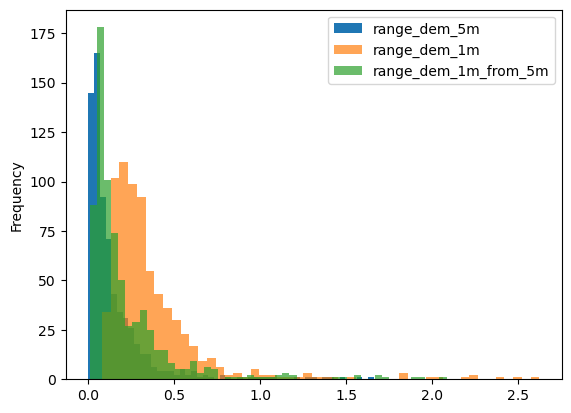

In [37]:
df_footprint['range_dem_5m'].plot.hist(bins=50, label='range_dem_5m')
df_footprint['range_dem_1m'].plot.hist(bins=50, label='range_dem_1m', alpha=0.7)
df_footprint['range_dem_1m_from_5m'].plot.hist(bins=50, label='range_dem_1m_from_5m', alpha=0.7)
plt.legend()

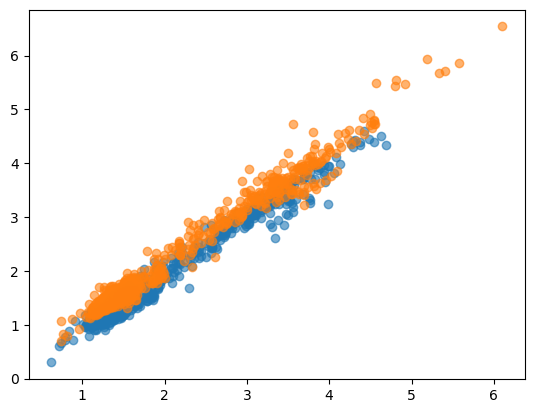

In [39]:
plt.scatter(df_footprint['min_dem_5m'], df_footprint['min_dem_1m'], alpha=0.6)
plt.scatter(df_footprint['max_dem_5m'], df_footprint['max_dem_1m'], alpha=0.6)

In [43]:
df_footprint['FFH_1m'] = df_footprint['LCC_FLOOR'] - df_footprint['min_dem_1m']
df_footprint['FFH_5m'] = df_footprint['LCC_FLOOR'] - df_footprint['min_dem_5m']
df_footprint['FFH_1m_from_5m'] = df_footprint['LCC_FLOOR'] - df_footprint['min_dem_1m_from_5m']

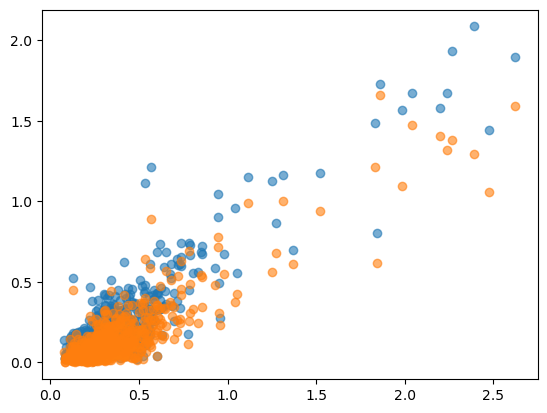

In [44]:
plt.scatter(df_footprint[df_footprint['FFH_1m']>0]['range_dem_1m'], df_footprint[df_footprint['FFH_1m']>0]['range_dem_1m_from_5m'], alpha=0.6)
plt.scatter(df_footprint[df_footprint['FFH_1m']>0]['range_dem_1m'], df_footprint[df_footprint['FFH_1m']>0]['range_dem_5m'], alpha=0.6)

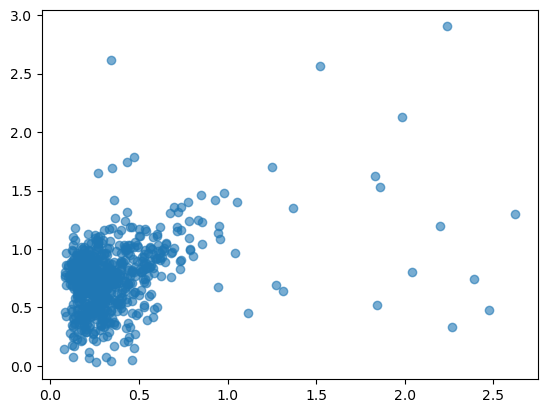

In [42]:
plt.scatter(df_footprint[df_footprint['FFH_1m']>0]['range_dem_1m'], df_footprint[df_footprint['FFH_1m']>0]['FFH_1m'], alpha=0.6)

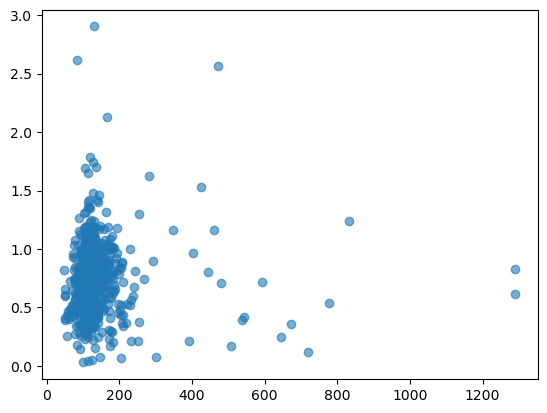

In [ ]:
plt.scatter(df_footprint[df_footprint['FFH_1m']>0]['NEXIS_FLOO'], df_footprint[df_footprint['FFH_1m']>0]['FFH_1m'], alpha=0.6)

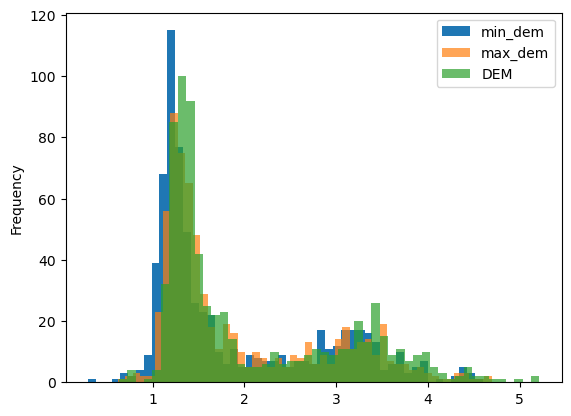

In [45]:
df_footprint['min_dem_1m'].plot.hist(bins=50, label='min_dem')
df_footprint['min_dem_5m'].plot.hist(bins=50, alpha=0.7, label='max_dem')
df_footprint['DEM'].plot.hist(bins=50, alpha=0.7, label='DEM')
plt.legend()

### Clean up categorical fields 

make all lower case; take first letter to combine y/yes, n/no etc

In [46]:
cate_cols = df_footprint.select_dtypes(exclude=[float, int]).columns[:-1]
print(cate_cols)
for col in cate_cols:
    df_footprint[col] = df_footprint[col].str.lower()

Index(['ZONE', 'LID', 'ADDRESS', 'SUBURB', 'POSTCODE', 'FEATURE_NA',
       'NEXIS_CAD_', 'SETTLEMENT', 'LOCAL_USE', 'NEXIS_USE_', 'NEXIS_USE1',
       'Survey_COM', 'Survey_G_1', 'Survey_Par', 'Survey_C_1', 'Survey_Gab',
       'NEXIS_CONS', 'USE', 'NEXIS_YEAR', 'LOCAL_ROOF', 'NEXIS_ROOF',
       'Survey_Roo', 'LOCAL_WALL', 'NEXIS_WALL', 'Survey_Wal', 'Survey_C_2',
       'Survey_Ind', 'NEXIS_NO_1', 'RENAISSA0', 'RENAISSA1', 'LCC_TYPE'],
      dtype='object')


In [47]:
df_footprint['Survey_C_1'] = df_footprint['Survey_C_1'].str[0:1]
df_footprint['Survey_Par'] = df_footprint['Survey_Par'].str[0:1]
df_footprint['Survey_Gab'] = df_footprint['Survey_Gab'].str[0:1]

In [48]:
df_footprint['LCC_TYPE'].unique()

array(['hse', 'hsebk', 'hsewb', 'house', 'bldwbhall', 'bldgi', 'res',
       'bldbk', None, 'bld', 'garage', 'gar', 'hseren', 'hsebkbrd',
       'hsewbbk', 'bldwb', 'bldal', 'bldfib', 'building', 'shd', 'notype',
       'hsesto', 'bldwbchu'], dtype=object)

## Explore regression model using different features


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

Explained Variance (R^2): 0.8942
Cross-Validation Accuracy (R^2): 0.6341
RMSE: 0.30049312970515646
['max_dem_1m' 'min_dem_1m' 'range_dem_1m' 'LOCAL_YEAR' 'NEXIS_FOOT'
 'NEXIS_FLOO' 'Survey_Grd' 'LCC_TYPE_hse' 'LCC_TYPE_house'
 'Survey_G_1_rtf']


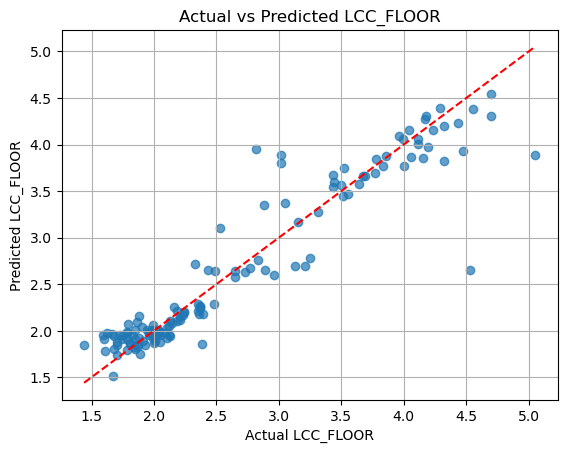

In [73]:


ffh_col = 'LCC_FLOOR' #'FFH_1m'
df_r = df_footprint#[df_footprint[ffh_col]>0]
#df_r = df_r[(df_r[ffh_col]>=0) & (df_r[ffh_col]<3)]

cat_features = ['Survey_G_1','LCC_TYPE', 'Survey_C_1', 'NEXIS_ROOF', 'NEXIS_WALL', 'NEXIS_CONS']
num_features = ['min_dem_1m', 'max_dem_1m', 'range_dem_1m', 'Survey_Grd', 'Survey_Chi', 'NEXIS_FOOT', 'NEXIS_FLOO', 'LOCAL_YEAR']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

**Predict LCC_FLOOR using DEM and Building attributes**

As expected, floor elevation is mostly driven by DEM

Explained Variance (R^2): 0.4711
[ 0.44095167 -0.06144824  0.08973905  0.03312149  0.20929772]
Cross-Validation Accuracy (R^2): 0.1423
RMSE: 0.20454133094629465
['range_dem_1m' 'min_dem_1m' 'LOCAL_YEAR' 'Survey_G_1_rtf'
 'NEXIS_YEAR_1992 - 1996' 'NEXIS_WALL_fibre cement'
 'NEXIS_YEAR_1914 - 1946' 'NEXIS_ROOF_metal sheeting' 'NEXIS_WALL_timber'
 'NEXIS_YEAR_1952 - 1961'] [0.41325853 0.24781218 0.16492957 0.06850405 0.0191528  0.01097949
 0.0099676  0.0084657  0.00695335 0.00610523]


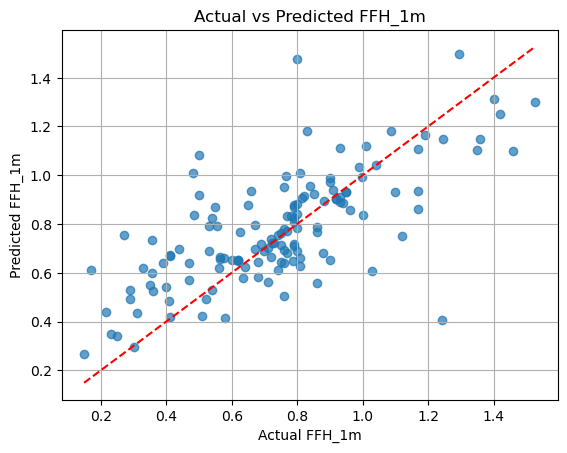

In [75]:

ffh_col = 'FFH_1m'
df_r = df_footprint[df_footprint[ffh_col]>0]
#df_r = df_r[(df_r[ffh_col]>=0) & (df_r[ffh_col]<3)]

cat_features = ['Survey_G_1', 'LCC_TYPE', 'Survey_C_1', 'NEXIS_ROOF', 'NEXIS_WALL', 'NEXIS_CONS']
num_features = ['min_dem_1m', 'max_dem_1m', 'range_dem_1m', 'Survey_Grd', 'Survey_Chi', 'NEXIS_FOOT', 'NEXIS_FLOO', 'LOCAL_YEAR']

cat_features = ['Survey_G_1', 'NEXIS_ROOF', 'NEXIS_WALL', 'NEXIS_YEAR'] #LCC_TYPE', 'Survey_C_1', 'Survey_Roo', 'Survey_Wal']
num_features = ['min_dem_1m', 'range_dem_1m', 'LOCAL_YEAR' ]#, 'max_dem_1m', 'Survey_Grd', 'Survey_Chi', 'NEXIS_FOOT', 'NEXIS_FLOO']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
print(cv_scores)
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10], importances[indices][:10])

Explained Variance (R^2): -0.1365
[ 0.0614482  -0.12979233 -0.02946921 -0.75186365  0.15865359]
Cross-Validation Accuracy (R^2): -0.1382
RMSE: 0.30690934604822406
['range_dem_1m' 'LOCAL_YEAR' 'max_dem_1m' 'NEXIS_FOOT' 'Survey_G_1_rtf'
 'min_dem_1m' 'NEXIS_FLOO' 'Survey_Chi' 'Survey_Wal_fibre cement'
 'Survey_Grd']


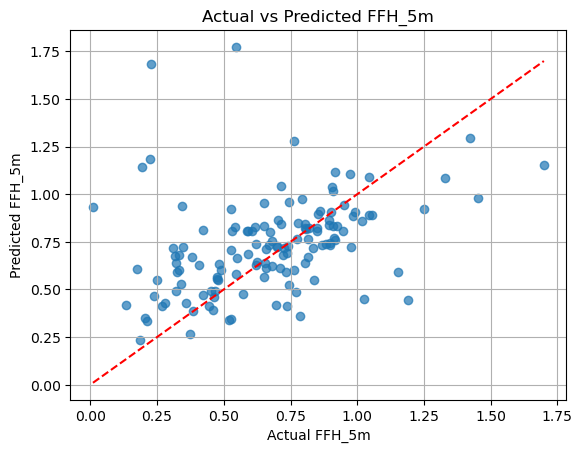

In [77]:

ffh_col = 'FFH_5m'
df_r = df_footprint[df_footprint[ffh_col]>0]
#df_r = df_r[(df_r[ffh_col]>=0) & (df_r[ffh_col]<3)]

cat_features = ['Survey_G_1','LCC_TYPE', 'Survey_C_1', 'Survey_Roo', 'Survey_Wal']
num_features = ['min_dem_1m', 'max_dem_1m', 'range_dem_1m', 'Survey_Grd', 'Survey_Chi', 'NEXIS_FOOT', 'NEXIS_FLOO', 'LOCAL_YEAR']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
print(cv_scores)
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

Explained Variance (R^2): 0.2198
[ 0.05603019 -0.11832003 -0.05182181 -0.72127801  0.11659253]
Cross-Validation Accuracy (R^2): -0.1438
RMSE: 0.2605926910287673
['range_dem_1m' 'LOCAL_YEAR' 'max_dem_1m' 'min_dem_1m' 'NEXIS_FOOT'
 'NEXIS_FLOO' 'Survey_G_1_rtf' 'LCC_TYPE_hse' 'Survey_Chi' 'Survey_Grd']


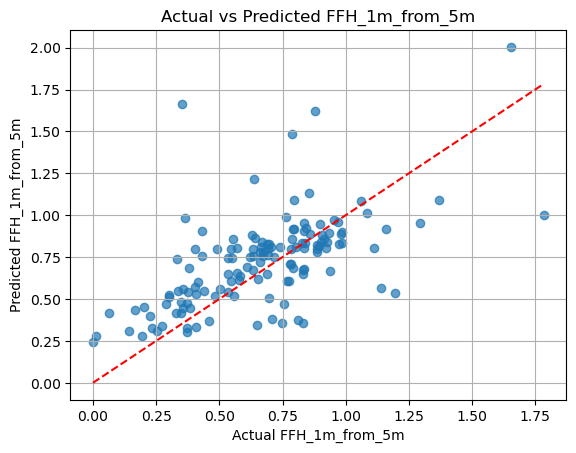

In [53]:

ffh_col = 'FFH_1m_from_5m'
df_r = df_footprint[df_footprint[ffh_col]>0]
#df_r = df_r[(df_r[ffh_col]>=0) & (df_r[ffh_col]<3)]

cat_features = ['Survey_G_1','LCC_TYPE', 'Survey_C_1', 'Survey_Roo', 'Survey_Wal']
num_features = ['min_dem_1m', 'max_dem_1m', 'range_dem_1m', 'Survey_Grd', 'Survey_Chi', 'NEXIS_FOOT', 'NEXIS_FLOO', 'LOCAL_YEAR']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
print(cv_scores)
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

**Predict FFH using DEM, DEM range and building attributes**

DEM range is the most important feature; 1m DEM works better than 5m.

### Check negative FFH

Negative FFH tend to occur on steep slopes

In [78]:

df_footprint[df_footprint.FFH<0][['LID', 'ADDRESS', 'Survey_G_1', 'DEM', 'min_dem_1m', 'max_dem_1m', 'LCC_FLOOR', 'FFH', 'FFH_1m']]


,LID,ADDRESS,Survey_G_1,DEM,min_dem_1m,max_dem_1m,LCC_FLOOR,FFH,FFH_1m
0,gnaf_gatas702296648,6 middle street,rtf,5.212643,4.400915,5.680000,3.37,-1.842643,-1.030915
1,gnaf_gatas702290011,8 middle street,rtf,5.162260,4.510356,5.943333,3.37,-1.792260,-1.140356
74,gnaf_gatas702288903,32 margaret street,rtf,4.016667,3.961597,4.090000,3.70,-0.316667,-0.261597
101,gnaf_gatas717319188,24 ross avenue,sog,3.315582,3.080000,3.870000,2.73,-0.585582,-0.350000
102,gnaf_gatas717319190,24 ross avenue,sog,3.677947,3.340000,4.580000,2.73,-0.947947,-0.610000
159,gnaf_gatas702327857,11 ray street,rtf,4.141800,3.495074,4.550000,2.82,-1.321800,-0.675074
161,gnaf_gatas717318597,14 rooms avenue,sog,2.648453,2.320000,2.760000,2.53,-0.118453,0.210000
162,gnaf_gatas717318598,14 rooms avenue,sog,2.367344,2.170000,2.640000,2.32,-0.047344,0.150000
165,gnaf_gatas702475462,1 albion street,timber,3.487056,3.170000,3.661782,3.02,-0.467056,-0.150000
166,gnaf_gatas702182562,3 albion street,timber,3.852499,3.230000,3.943338,3.02,-0.832499,-0.210000


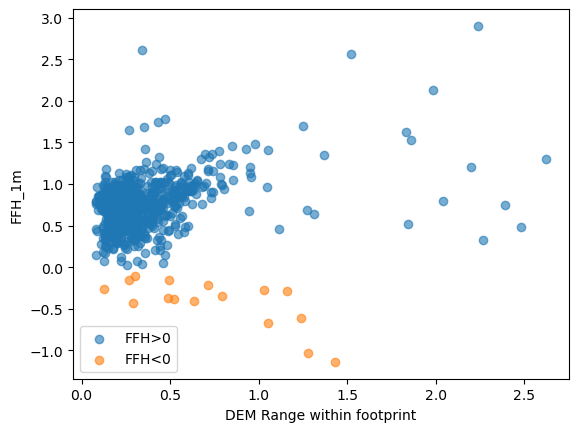

In [81]:
plt.scatter(df_footprint[df_footprint['FFH_1m']>0]['range_dem_1m'], df_footprint[df_footprint['FFH_1m']>0]['FFH_1m'], alpha=0.6, label='FFH>0')
plt.scatter(df_footprint[df_footprint['FFH_1m']<=0]['range_dem_1m'], df_footprint[df_footprint['FFH_1m']<=0]['FFH_1m'], alpha=0.6, label='FFH<0')
plt.xlabel('DEM Range within footprint')
plt.ylabel('FFH_1m')
plt.legend()